In [1]:
from __future__ import division
import numpy
import random
import math
import pylab
 

In [2]:
TRAIN_FILE = "C:\\Users\\Bipin Kumar Mishr\\tapas data\\IIITG Lab assignments\\DATA ANALYTICS\cs606-lab8\\cs606-lab8-reccomenders-tapasm2027-master\\recolab-data-master\\latent\\train.txt"
TEST_FILE = "C:\\Users\\Bipin Kumar Mishr\\tapas data\\IIITG Lab assignments\\DATA ANALYTICS\cs606-lab8\\cs606-lab8-reccomenders-tapasm2027-master\\recolab-data-master\\latent\test.txt"

In [3]:
def get_matrix_dims(fileName):
    maxUserId = 0
    maxMovieId = 0
    data = open(fileName,"r")
    count = 0
    for line in data:
        count += 1
        [userId, movieId, rating] = line.split("\t")
        if int(movieId) > maxMovieId:
            maxMovieId  = int(movieId)

        if int(userId) > maxUserId: 
            maxUserId  = int(userId)
    data.close()
            
    return (maxUserId, maxMovieId)

In [4]:
def create_random_matrix(rows, cols):
    tmp = numpy.array([random.gauss(0, math.sqrt(5/cols)) for i in range(rows*cols)])
    tmp.shape = (rows,cols)
    return tmp

In [5]:
def total_error(P, Q, RFile, lam):
    data = open(RFile,"r")
    err = 0.0
    sumPL2Norm = sum([numpy.dot(i,i) for i in P])
    sumQL2Norm = sum([numpy.dot(i,i) for i in Q])
    
    for line in data:
        [u, i, r] = line.split("\t")
        u = int(u) - 1
        i = int(i) - 1
        r = float(r)
        err = err + math.pow((r - numpy.dot(Q[i,:], P[u,:])),2)
        
    err = err + lam * (sumPL2Norm + sumQL2Norm)
    
    return err

In [6]:
def t_error(P, Q, RFile):
    data = open(RFile,"r")
    err = 0.0
    
    for line in data:
        [u, i, r] = line.split("\t")
        u = int(u) - 1
        i = int(i) - 1
        r = float(r)
        err = err + math.pow((r - numpy.dot(Q[i,:], P[u,:])),2)
    
    return err

In [7]:
def stochastic_gradient_descent(P, Q, RFile, iter, lam, eta):
    print ("Running SGD for %s iterations." % iter)
    boom = False
    error = []
    for j in range(iter):
        if boom: break
        print ("Iteration :",j, "...",)
        data = open(RFile,"r")
        for line in data: 
            # Get u , m , r
            [u, i, r] = line.split("\t")
            # Numpy indexes array from 0
            u = int(u) - 1
            i = int(i) - 1
            r = float(r)

            if math.isnan(numpy.dot(Q[i,:], P[u,:])):
                errorTxt =  "(Iteration %s :Nan at u: %s i: %s r: %s )" \
                                % (j,u,i,r)
                boom = True
                raise Exception(errorTxt)
              
            # Calculate Error
            e = 2*(r - numpy.dot(Q[i,:], P[u,:])) 

            #Update q
            tmp_q = Q[i,:] + eta*(e*P[u,:] - 2*lam*Q[i,:])

            #Update p
            tmp_p = P[u,:] + eta*(e*Q[i,:] - 2*lam*P[u,:])
       
            Q[i,:] = tmp_q
            P[u,:] = tmp_p
           
        data.close() 
        print ("done.",)
        error.append(total_error(P,Q,RFile,lam))
        print ("Error:[ %s ]" % (error[j]))
    return P, Q, error

In [8]:
(u,m) = get_matrix_dims(TRAIN_FILE)

In [9]:
k = 20
iter = 40
lam = 0.1

eta = 0.03
P = create_random_matrix(u, k)
Q = create_random_matrix(m, k) 
P1, Q1, e1 = stochastic_gradient_descent(P,Q,TRAIN_FILE,iter,lam,eta)

Running SGD for 40 iterations.
Iteration : 0 ...
done.
Error:[ 93532.10031900229 ]
Iteration : 1 ...
done.
Error:[ 84351.0154406276 ]
Iteration : 2 ...
done.
Error:[ 80275.82016575489 ]
Iteration : 3 ...
done.
Error:[ 77416.71681240688 ]
Iteration : 4 ...
done.
Error:[ 75089.2777516769 ]
Iteration : 5 ...
done.
Error:[ 73154.07566783408 ]
Iteration : 6 ...
done.
Error:[ 71548.40794599219 ]
Iteration : 7 ...
done.
Error:[ 70215.6513761802 ]
Iteration : 8 ...
done.
Error:[ 69106.38443090855 ]
Iteration : 9 ...
done.
Error:[ 68180.83542815641 ]
Iteration : 10 ...
done.
Error:[ 67407.20975523168 ]
Iteration : 11 ...
done.
Error:[ 66759.28778961612 ]
Iteration : 12 ...
done.
Error:[ 66214.92840530163 ]
Iteration : 13 ...
done.
Error:[ 65755.40549088208 ]
Iteration : 14 ...
done.
Error:[ 65365.087929502064 ]
Iteration : 15 ...
done.
Error:[ 65031.15007705289 ]
Iteration : 16 ...
done.
Error:[ 64743.223985575074 ]
Iteration : 17 ...
done.
Error:[ 64493.0155880805 ]
Iteration : 18 ...
done.
Er

Text(0.5, 1.0, 'Gradient Descent : Error vs. Iterations')

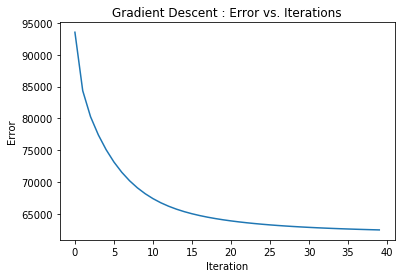

In [10]:
f0 = pylab.figure()
p1 = f0.add_subplot(111)
p1.plot([i for i in range(iter)],e1) 
p1.set_xlabel("Iteration")
p1.set_ylabel("Error")
p1.set_title("Gradient Descent : Error vs. Iterations")